In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Preprocessing

1. Separate data into web and field surveys
2. Get a list of the songs (by id) and what their ground truth function is: `song_functions`
3. Group all of the ratings for each song together (while still keeping each of the four primary rating categories separate). The result is a $4 \times s$ matrix with the average rating of each song in each of the categories, where $s$ is the total number of songs.

In [14]:
df = pd.read_csv('FFfull.csv', low_memory=False)

web_df = df[df['study'] == 'web'].copy()
field_df = df[df['study'] == 'field'].copy()

song_functions = df.groupby("song").agg({'songfunction': 'first'})

# Get ratings and normalize
web_ratings = web_df[["song","danc","heal","baby","love"]]  # Removed distractor columns
average_by_song = web_ratings.groupby('song').mean()
normalized_ratings = (average_by_song - average_by_song.mean()) / average_by_song.std()

In [28]:
# Get indices for each song type
baby_idx = song_functions[song_functions['songfunction'] == 'baby'].index
love_idx = song_functions[song_functions['songfunction'] == 'love'].index
heal_idx = song_functions[song_functions['songfunction'] == 'heal'].index
danc_idx = song_functions[song_functions['songfunction'] == 'danc'].index

def plot_violin_half(ax, function, side):
    # For love song dimension
    ratings = [
        normalized_ratings.loc[danc_idx, function],
        normalized_ratings.loc[heal_idx, function],
        normalized_ratings.loc[love_idx, function],
        normalized_ratings.loc[baby_idx, function]
    ]
    ax.violinplot(ratings, side=side, points=100)
    ax.set_xticks(range(1, 5))
    ax.set_xticklabels(['dance', 'heal', 'love', 'lully'])
    ax.set_title(f'Ratings on {function} dimension')
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

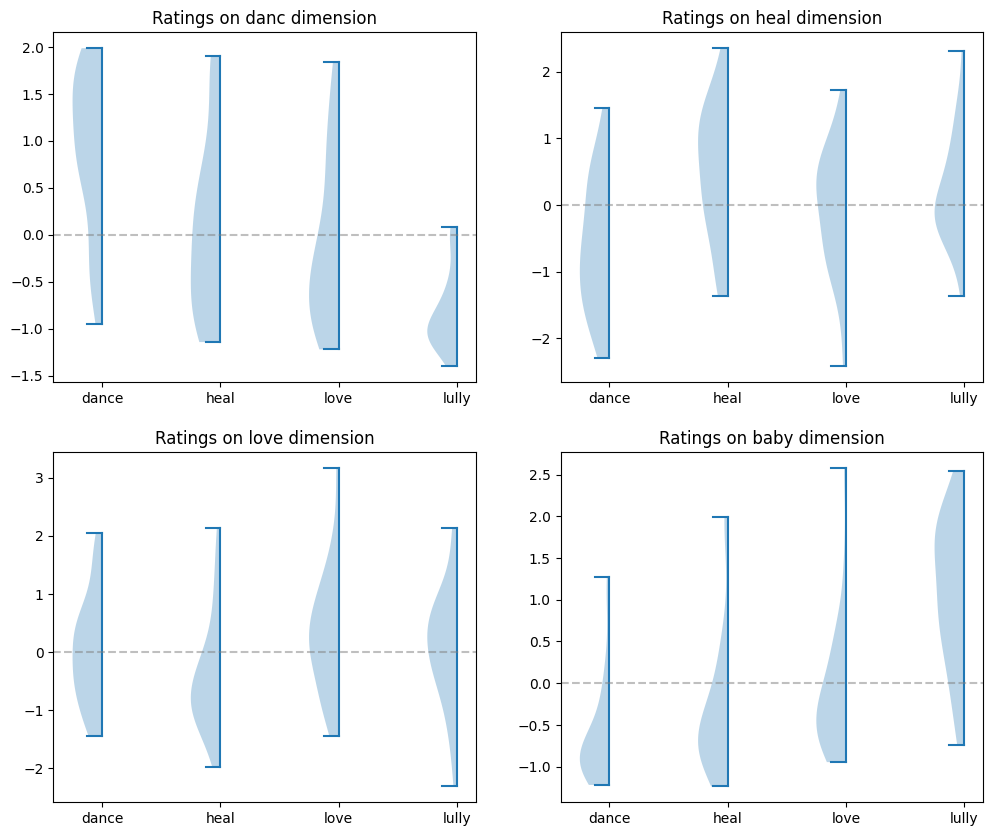

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

plot_violin_half(ax1, "danc", "low")
plot_violin_half(ax2, "heal", "low")
plot_violin_half(ax3, "love", "low")
plot_violin_half(ax4, "baby", "low")

